In [2]:
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


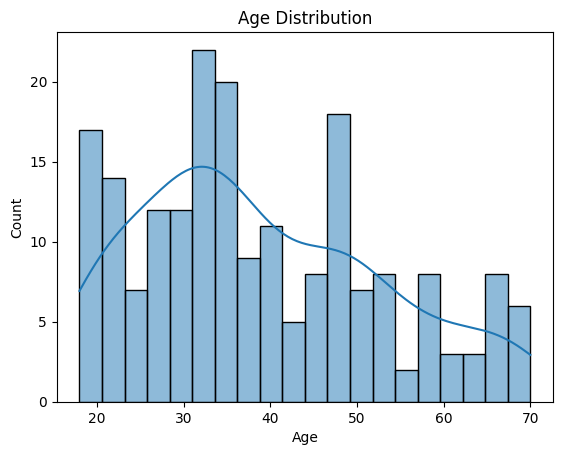

In [14]:
# basic EDA

# Age distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")


plt.show()



Text(0.5, 1.0, 'Annual Income Distribution')

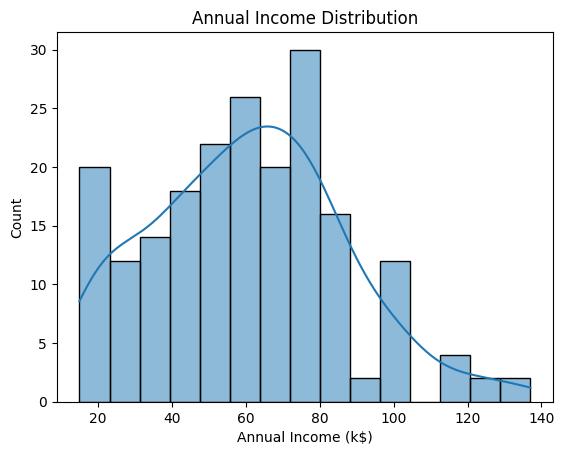

In [17]:
# Income distribution
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15)
plt.title("Annual Income Distribution")

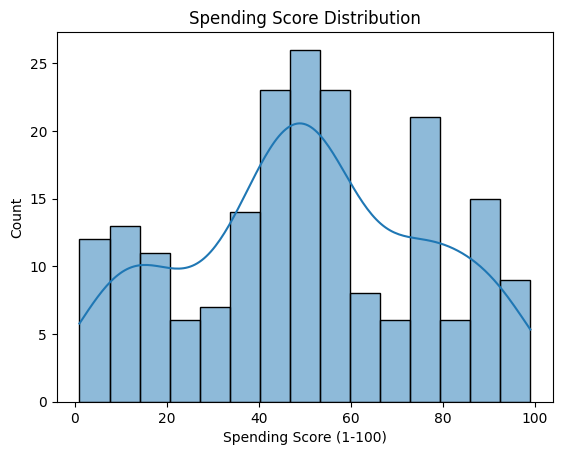

In [18]:
# Spending score distribution
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15)
plt.title("Spending Score Distribution")

plt.show()

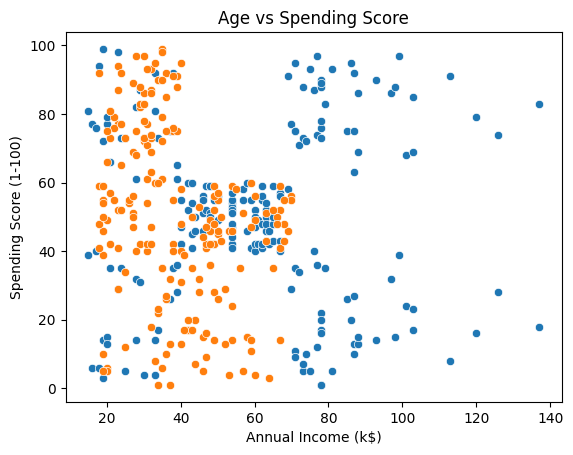

In [24]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Income vs Spending Score")

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title("Age vs Spending Score")
plt.show()




## Insghits 

# Age Distribution

Most customers fall between 18–45 years.
The highest number of customers are around 30 years old.
Very few customers are older than 60.

# Annual Income Distribution

Annual income ranges roughly between $15k to $140k.
Most customers belong to the middle-income group (around $40k–$70k)

# Spending Score Distribution

Spending Score ranges from 1 to 100, representing how much customers spend or how loyal they are.

The distribution is fairly uniform, meaning there are both high and low spenders.

## Feature selection



In [25]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [26]:
# normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Elbow Method (Optimal Clusters nikaalna)

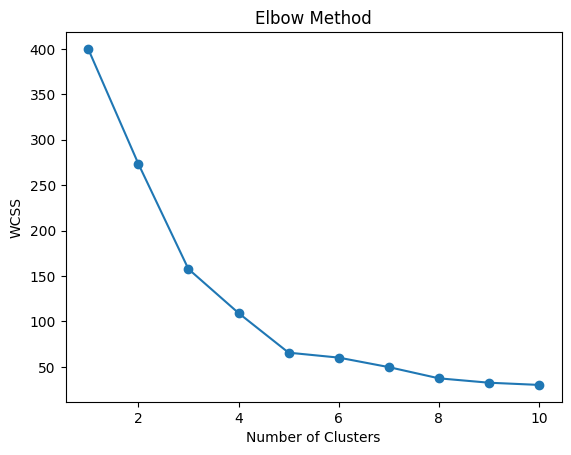

In [27]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


appliying k-means clustring 

In [29]:
from sklearn.cluster import KMeans

# Apply K-Means with optimal clusters (example: 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit and predict clusters
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to your original data
df['Cluster'] = y_kmeans


visualizing the  cluster 


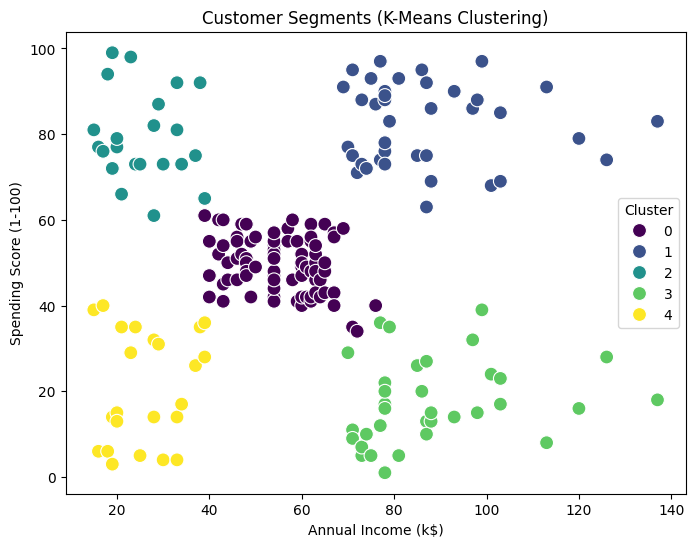

In [31]:


plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X['Annual Income (k$)'], 
    y=X['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [32]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


| Cluster | Avg Age | Avg Income (k$) | Avg Spending Score | Segment Type                                |
| ------- | ------- | --------------- | ------------------ | ------------------------------------------- |
| **0**   | 42.7    | 55.3            | 49.5               | Balanced / Average Customers                |
| **1**   | 32.7    | 86.5            | 82.1               | **Luxury Customers**                        |
| **2**   | 25.3    | 25.7            | 79.4               | **Young High Spenders**                     |
| **3**   | 41.1    | 88.2            | 17.1               | **Wealthy but Careful Spenders**            |
| **4**   | 45.2    | 26.3            | 20.9               | **Low Income, Low Spending (Budget Group)** |


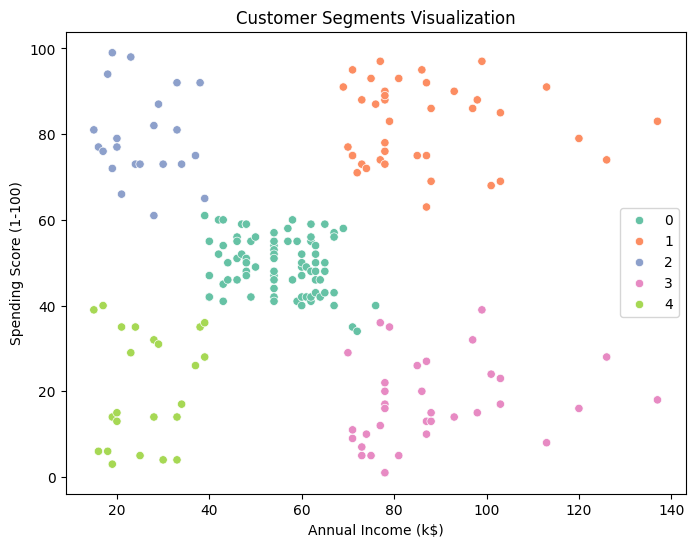

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=kmeans.labels_, palette='Set2', data=df)
plt.title('Customer Segments Visualization')
plt.show()
